<a href="https://colab.research.google.com/github/shubham7423/Mask-Detection-IOS-App/blob/master/Mask_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Fetch data from google drive

In [1]:
!cp drive/My\ Drive/mask/dataset.zip ../content/

In [2]:
!unzip dataset.zip -d data/

Archive:  dataset.zip
   creating: data/dataset/
  inflating: data/dataset/.DS_Store  
  inflating: data/__MACOSX/dataset/._.DS_Store  
   creating: data/dataset/with_mask/
  inflating: data/__MACOSX/dataset/._with_mask  
   creating: data/dataset/without_mask/
  inflating: data/__MACOSX/dataset/._without_mask  
  inflating: data/dataset/with_mask/augmented_image_218.jpg  
  inflating: data/__MACOSX/dataset/with_mask/._augmented_image_218.jpg  
  inflating: data/dataset/with_mask/augmented_image_19.jpg  
  inflating: data/__MACOSX/dataset/with_mask/._augmented_image_19.jpg  
  inflating: data/dataset/with_mask/augmented_image_31.jpg  
  inflating: data/__MACOSX/dataset/with_mask/._augmented_image_31.jpg  
  inflating: data/dataset/with_mask/augmented_image_25.jpg  
  inflating: data/__MACOSX/dataset/with_mask/._augmented_image_25.jpg  
  inflating: data/dataset/with_mask/augmented_image_230.jpg  
  inflating: data/__MACOSX/dataset/with_mask/._augmented_image_230.jpg  
  inflating: data

In [3]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.layers import AveragePooling2D, Dropout, Flatten, Dense, InputLayer, Input, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input
from tensorflow.keras.preprocessing.image import img_to_array, load_img
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from imutils import paths
import numpy as np

##Load data and preprocess

In [4]:
imagePaths = list(paths.list_images('data/dataset/'))
data = []
labels = []
num_images = len(imagePaths)
for i, imagePath in enumerate(imagePaths):
  image = load_img(imagePath, target_size=(224, 224))
  image = img_to_array(image)
  image = preprocess_input(image)

  data.append(image)
  print('Processed {} images of {}'.format(i+1, num_images))
  labels.append(imagePath.split('/')[-2])


Processed 1 images of 1376
Processed 2 images of 1376
Processed 3 images of 1376
Processed 4 images of 1376
Processed 5 images of 1376
Processed 6 images of 1376
Processed 7 images of 1376
Processed 8 images of 1376
Processed 9 images of 1376
Processed 10 images of 1376
Processed 11 images of 1376
Processed 12 images of 1376
Processed 13 images of 1376
Processed 14 images of 1376
Processed 15 images of 1376
Processed 16 images of 1376
Processed 17 images of 1376
Processed 18 images of 1376
Processed 19 images of 1376
Processed 20 images of 1376
Processed 21 images of 1376
Processed 22 images of 1376
Processed 23 images of 1376
Processed 24 images of 1376
Processed 25 images of 1376
Processed 26 images of 1376
Processed 27 images of 1376
Processed 28 images of 1376
Processed 29 images of 1376
Processed 30 images of 1376
Processed 31 images of 1376
Processed 32 images of 1376
Processed 33 images of 1376
Processed 34 images of 1376
Processed 35 images of 1376
Processed 36 images of 1376
P

In [5]:
data = np.array(data)
labels = np.array(labels)

In [6]:
data.shape

(1376, 224, 224, 3)

In [7]:
lb = LabelBinarizer()
labels = lb.fit_transform(labels)
labels = to_categorical(labels)

In [8]:
(X_train, X_test, y_train, y_test) = train_test_split(data, labels, train_size=0.8, stratify=labels, random_state=42)

aug = ImageDataGenerator(
    rotation_range=20,
    zoom_range=0.15,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.15,
    horizontal_flip=True,
    fill_mode="nearest"
)


##Build model

In [9]:
input_shape = (224, 224, 3)

In [10]:
model = Sequential()
model.add(InputLayer(input_shape=input_shape))
model.add(MobileNetV2(weights='imagenet', include_top=False))
model.add(AveragePooling2D(pool_size=(7, 7)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(2, activation='softmax'))

9412608/9406464 [==============================] - 0s 0us/step


In [11]:
# x = MobileNetV2(weights='imagenet', include_top=False)
# x.pop()
# x.summary()

In [12]:
LR = 1e-4
BS = 32
epochs = 20
opt = Adam(lr=LR, decay=LR / epochs)
model.compile(loss="categorical_crossentropy", optimizer=opt,
	metrics=["accuracy"])


In [13]:
H = model.fit(
    aug.flow(X_train, y_train, batch_size=BS),
    steps_per_epoch=len(X_train)//BS,
    validation_data=(X_test, y_test),
    validation_steps=len(X_test)//BS,
    epochs=epochs
)

Epoch 1/20
34/34 [==============================] - 19s 561ms/step - loss: 0.3328 - accuracy: 0.8614 - val_loss: 0.0414 - val_accuracy: 0.9891
Epoch 2/20
34/34 [==============================] - 17s 498ms/step - loss: 0.0638 - accuracy: 0.9775 - val_loss: 0.0248 - val_accuracy: 0.9928
Epoch 3/20
34/34 [==============================] - 17s 496ms/step - loss: 0.0352 - accuracy: 0.9897 - val_loss: 0.0221 - val_accuracy: 0.9928
Epoch 4/20
34/34 [==============================] - 17s 498ms/step - loss: 0.0207 - accuracy: 0.9944 - val_loss: 0.0182 - val_accuracy: 0.9928
Epoch 5/20
34/34 [==============================] - 17s 498ms/step - loss: 0.0218 - accuracy: 0.9925 - val_loss: 0.0176 - val_accuracy: 0.9928
Epoch 6/20
34/34 [==============================] - 17s 496ms/step - loss: 0.0150 - accuracy: 0.9953 - val_loss: 0.0152 - val_accuracy: 0.9928
Epoch 7/20
34/34 [==============================] - 17s 494ms/step - loss: 0.0157 - accuracy: 0.9953 - val_loss: 0.0108 - val_accuracy: 0.9928

In [14]:
model.evaluate(X_test, y_test)

9/9 [==============================] - 1s 114ms/step - loss: 0.0046 - accuracy: 0.9964


[0.004589356016367674, 0.9963768124580383]

In [15]:
y_pred = model.predict(X_test)
y_pred = np.argmax(y_pred, axis=1)
print(classification_report(y_pred=y_pred, y_true=np.argmax(y_test, axis=1)))

              precision    recall  f1-score   support

           0       0.99      1.00      1.00       138
           1       1.00      0.99      1.00       138

    accuracy                           1.00       276
   macro avg       1.00      1.00      1.00       276
weighted avg       1.00      1.00      1.00       276



In [16]:
model.save("mask_detection.h5")

##Testing model on custom inputs

In [18]:
!wget https://i.pinimg.com/474x/0d/de/de/0ddedeaf55601af87eb5b62f377103c7--mobile-wallpaper-the-big-bang-theory-wallpaper.jpg

--2020-07-29 09:13:40--  https://i.pinimg.com/474x/0d/de/de/0ddedeaf55601af87eb5b62f377103c7--mobile-wallpaper-the-big-bang-theory-wallpaper.jpg
Resolving i.pinimg.com (i.pinimg.com)... 151.101.76.84, 2600:1417:76:499::1931, 2600:1417:76:489::1931, ...
Connecting to i.pinimg.com (i.pinimg.com)|151.101.76.84|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 55694 (54K) [image/jpeg]
Saving to: ‘0ddedeaf55601af87eb5b62f377103c7--mobile-wallpaper-the-big-bang-theory-wallpaper.jpg’

0ddedeaf55601af87eb 100%[===================>]  54.39K  --.-KB/s    in 0.03s   

2020-07-29 09:13:40 (1.99 MB/s) - ‘0ddedeaf55601af87eb5b62f377103c7--mobile-wallpaper-the-big-bang-theory-wallpaper.jpg’ saved [55694/55694]



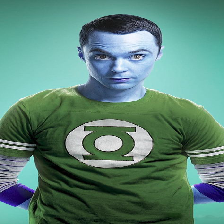

['without_mask'] :  [0.9316329]


In [19]:
from google.colab.patches import cv2_imshow
image = load_img('/content/0ddedeaf55601af87eb5b62f377103c7--mobile-wallpaper-the-big-bang-theory-wallpaper.jpg', target_size=(224, 224))
image = img_to_array(image)
cv2_imshow(image)
image = preprocess_input(image)
image = np.expand_dims(image, axis=0)
x = model.predict(image)
print(lb.classes_[np.argmax(x, axis=1)], ": ", x[0][np.argmax(x, axis=1)])

In [20]:
!wget https://www.onemedical.com/media/images/woman-wearing-mask.width-1440.jpg

--2020-07-29 09:13:51--  https://www.onemedical.com/media/images/woman-wearing-mask.width-1440.jpg
Resolving www.onemedical.com (www.onemedical.com)... 13.224.153.128, 13.224.153.42, 13.224.153.60, ...
Connecting to www.onemedical.com (www.onemedical.com)|13.224.153.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 123938 (121K) [image/jpeg]
Saving to: ‘woman-wearing-mask.width-1440.jpg’

woman-wearing-mask. 100%[===================>] 121.03K  --.-KB/s    in 0.03s   

2020-07-29 09:13:51 (4.59 MB/s) - ‘woman-wearing-mask.width-1440.jpg’ saved [123938/123938]



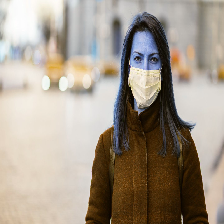

['with_mask'] :  [0.99995565]


In [21]:
image = load_img('woman-wearing-mask.width-1440.jpg', target_size=(224, 224))
image = img_to_array(image)
cv2_imshow(image)
image = preprocess_input(image)
image = np.expand_dims(image, axis=0)
x = model.predict(image)
print(lb.classes_[np.argmax(x, axis=1)], ": ", x[0][np.argmax(x, axis=1)])

In [22]:
!wget https://www.cidrap.umn.edu/sites/default/files/public/styles/detail/public/media/article/woman_wearing_mask_in_airport.jpg?itok=qykld-R-

--2020-07-29 09:14:00--  https://www.cidrap.umn.edu/sites/default/files/public/styles/detail/public/media/article/woman_wearing_mask_in_airport.jpg?itok=qykld-R-
Resolving www.cidrap.umn.edu (www.cidrap.umn.edu)... 199.167.77.60
Connecting to www.cidrap.umn.edu (www.cidrap.umn.edu)|199.167.77.60|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 13558 (13K) [image/jpeg]
Saving to: ‘woman_wearing_mask_in_airport.jpg?itok=qykld-R-’

woman_wearing_mask_ 100%[===================>]  13.24K  --.-KB/s    in 0s      

2020-07-29 09:14:01 (249 MB/s) - ‘woman_wearing_mask_in_airport.jpg?itok=qykld-R-’ saved [13558/13558]



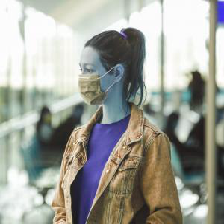

['with_mask'] :  [0.98490244]


In [23]:
image = load_img('/content/woman_wearing_mask_in_airport.jpg?itok=qykld-R-', target_size=(224, 224))
image = img_to_array(image)
cv2_imshow(image)
image = preprocess_input(image)
image = np.expand_dims(image, axis=0)
x = model.predict(image)
print(lb.classes_[np.argmax(x, axis=1)], ": ", x[0][np.argmax(x, axis=1)])

##Convert model to mlmodel 

In [ ]:
# coremltools is required to convert model to mlmodel
!pip install coremltools==4.0b1

     |████████████████████████████████| 604kB 2.8MB/s 
  Created wheel for coremltools: filename=coremltools-4.0b1-cp36-none-any.whl size=796442 sha256=f6c476ed2c426b0dfbdabcfb88945615b85e8ebb29e160aa86750c63cf37d636
  Stored in directory: /root/.cache/pip/wheels/e6/2f/39/c7f309170b37269d937c226e676611092188765da1a7213a54
  Created wheel for attr: filename=attr-0.3.1-cp36-none-any.whl size=2459 sha256=ab18c3314c24ee2caf12dcf4997b88b16515e5e86b5c228f3badde53fb20e93d
  Stored in directory: /root/.cache/pip/wheels/f0/96/9b/1f8892a707d17095b5a6eab0275da9d39e68e03a26aee2e726
Successfully built coremltools attr


In [ ]:
import coremltools as ct

inputs = ct.ImageType(scale=(1/127), bias=[-1.0, -1.0, -1.0])
classifier_config=ct.ClassifierConfig(['Mask on :)', 'Mask off!!'])

mlmodel = ct.convert(model=model, 
                    inputs=[inputs],
                    source='tensorflow',
                    classifier_config=classifier_config,
                    )

Translating MIL ==> MLModel Ops: 100%|██████████| 709/709 [00:00<00:00, 1927.66 ops/s]


In [ ]:
mlmodel

input {
  name: "input_1"
  type {
    imageType {
      width: 224
      height: 224
      colorSpace: RGB
      imageSizeRange {
        widthRange {
          lowerBound: 224
          upperBound: 224
        }
        heightRange {
          lowerBound: 224
          upperBound: 224
        }
      }
    }
  }
}
output {
  name: "Identity"
  type {
    dictionaryType {
      stringKeyType {
      }
    }
  }
}
output {
  name: "classLabel"
  type {
    stringType {
    }
  }
}
predictedFeatureName: "classLabel"
predictedProbabilitiesName: "Identity"
metadata {
  userDefined {
    key: "com.github.apple.coremltools.source"
    value: "tensorflow==2.2.0"
  }
  userDefined {
    key: "com.github.apple.coremltools.version"
    value: "4.0b1"
  }
}

In [ ]:
mlmodel.save('mask_detection.mlmodel')